# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is : data.csv.
- The codebook (explaining what the variables mean) is : codebook.csv.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# READ IN THE DATA SET HERE
codebook = pd.read_csv('codebook.csv')
codebook.head()

,Name,Variable full label,Variable description,Valid range,Scoring,Value indicating missing data,Value indicating inapplicable data,Experiment file used
0,ID,Participant ID,Participant's study number/identifier,KB1 - KB52,NaN,0,NaN,NaN
1,netID,UVA netID,Student's UVA netID identifier,NaN,NaN,0,NaN,NaN
2,Date.P1,Date part 1,Date of part 1 session,00/00/00,NaN,0,NaN,NaN
3,Date.P2,Date part 2,Date of part 2 session (1 week later),00/00/00,NaN,0,NaN,NaN
4,Condition,Condition assigned,Participant's assigned study condition (block ...,Retrieval OR Concept,NaN,0,NaN,NaN


In [3]:
data = pd.read_csv('data.csv')
data.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,...,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later. 

               PR.2
Condition          
Concept    0.690385
Retrieval  0.576471


<AxesSubplot:xlabel='Condition'>

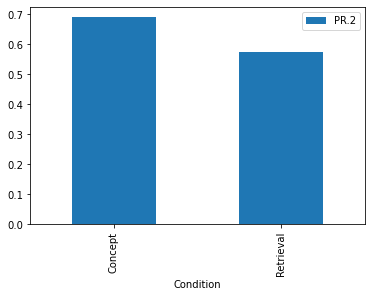

In [4]:
# YOUR CODE HERE
predictionScore = pd.pivot_table(data=data, values='PR.2', index='Condition', aggfunc=np.mean)
print(predictionScore)
predictionScore.plot.bar()

The concept group predicts they learned about 69.03% while the retrieval group predicts like they learned about 57.64%. So the concept group feels like they learned around more than the retrieval group.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

             TS.avg
Condition          
Concept    0.468846
Retrieval  0.616471


<AxesSubplot:xlabel='Condition'>

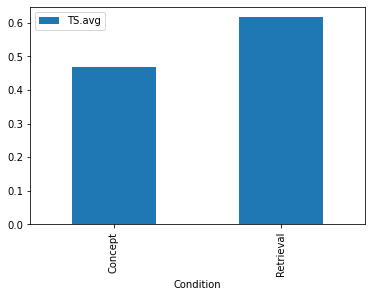

In [5]:
# YOUR CODE HERE
avgScore = pd.pivot_table(data=data, values='TS.avg', index='Condition', aggfunc=np.mean)
print(avgScore)
avgScore.plot.bar()


The concept group had an average score about 46.88% of information whereas the retrieval group average score was 61.64%. This indicates the results were actually the opposite of what the students predicted. The retrieval group was more successful on the exam and learned more overall. 
The variable we used was TS.avg which represents the average of the test scores TS.1 and TS.2. We perform the calculation (TS.1+TS.2)/2

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

               PR.2
Condition          
Concept    0.778462
Retrieval  0.960000


/var/folders/8s/b4dwb16174x344bs1ylrswmc0000gr/T/ipykernel_77192/1518465952.py:5: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  diff = abs(np.subtract(predictionScore, avgScore))


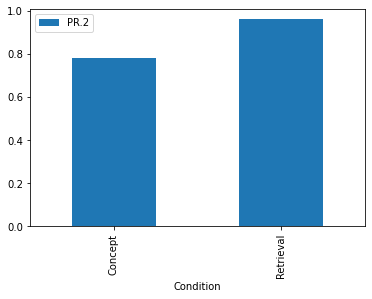

In [6]:
# YOUR CODE HERE

predictionScore = pd.pivot_table(data=data, values='PR.2', index='Condition', aggfunc=np.mean)
avgScore = pd.pivot_table(data=data, values='TS.avg', index='Condition', aggfunc=np.mean)
diff = abs(np.subtract(predictionScore, avgScore))
# print(diff)
predictionAccuracy = 1 - diff
predictionAccuracy.plot.bar()
print(predictionAccuracy)

The retrieval group was better at predicting how well they would do on the follow up learning test compared to concept group. The difference between the scores for the concept group and the retrieval group is 0.182. We subtract the difference from 1 because 1 is the sum. We take the absolute value to turn the negative difference into positive difference. 

# Question 4

This was a completely randomized experiment. This means that the condition that each subject was assigned to should be independent of their gender, age, and any other subject characteristics. Does that seem to be true in this case? Calculate a summary measure and/or make a visualization, and explain what you see.

<AxesSubplot:xlabel='Condition'>

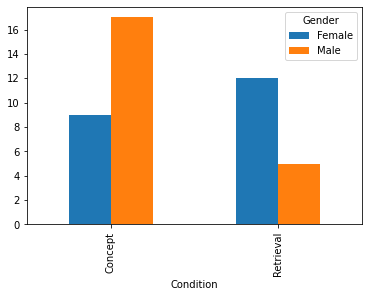

In [7]:
# YOUR CODE HERE
pd.pivot_table(data=data, index=['Condition'], columns=['Gender'], values='ID', aggfunc='count').plot.bar()

<AxesSubplot:xlabel='Condition'>

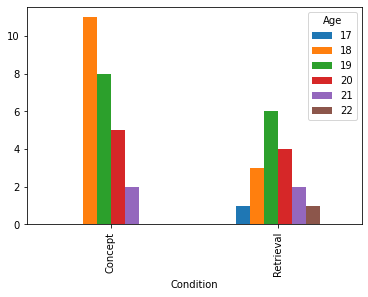

In [8]:
pd.pivot_table(data=data, index=['Condition'], columns=['Age'], values='ID', aggfunc='count').plot.bar()

The results related to age are randomized, however it shouldn't be completely balanced. In the concept group, we see 18 year olds reported the most success compared to other ages. In the retrieval group 19 year olds reported the most success. In both groups we see the remaining ages have much smaller numbers. The results related to gender are randomized and representative. In the concept group, we have almost twice the amount of males reporting success compared to females. In the retrieval group we have the opposite with twice the amount of females reporting success compared to males. 

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

4. Upload the Notebook (ipynb) to canvas.